In [1]:

import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
%matplotlib inline


In [3]:
player=pd.read_csv('2010-11.csv')
player.columns=['W_PCT','AGE','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','PLUS_MINUS','FP','DD2','TD3']
player.head()

W_PCT  AGE  FGM  FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  ...  STL  BLK  \
0  0.441   26  3.7  9.9   0.375   1.2   4.0    0.297  2.1  2.4  ...  0.6  0.1   
1  0.512   26  1.4  2.4   0.566   0.0   0.0    0.000  0.4  0.8  ...  0.3  0.3   
2  0.392   26  1.6  3.6   0.435   0.1   0.7    0.167  0.9  1.3  ...  0.6  0.0   
3  0.440   24  2.3  6.4   0.356   0.8   3.0    0.275  1.1  1.6  ...  0.6  0.0   
4  0.616   31  3.8  9.2   0.416   1.6   4.5    0.357  1.2  1.6  ...  0.5  0.1   

   BLKA   PF  PFD   PTS  PLUS_MINUS    FP  DD2  TD3  
0   0.7  1.9  2.1  10.7        -2.8  18.5    2    0  
1   0.3  2.3  0.7   3.1         0.7   9.6    2    0  
2   0.4  1.2  1.2   4.2        -2.6   9.2    0    0  
3   0.2  1.2  1.5   6.5         0.5  12.3    0    0  
4   0.6  2.8  1.5  10.5         1.8  18.6    1    0  

[5 rows x 26 columns]

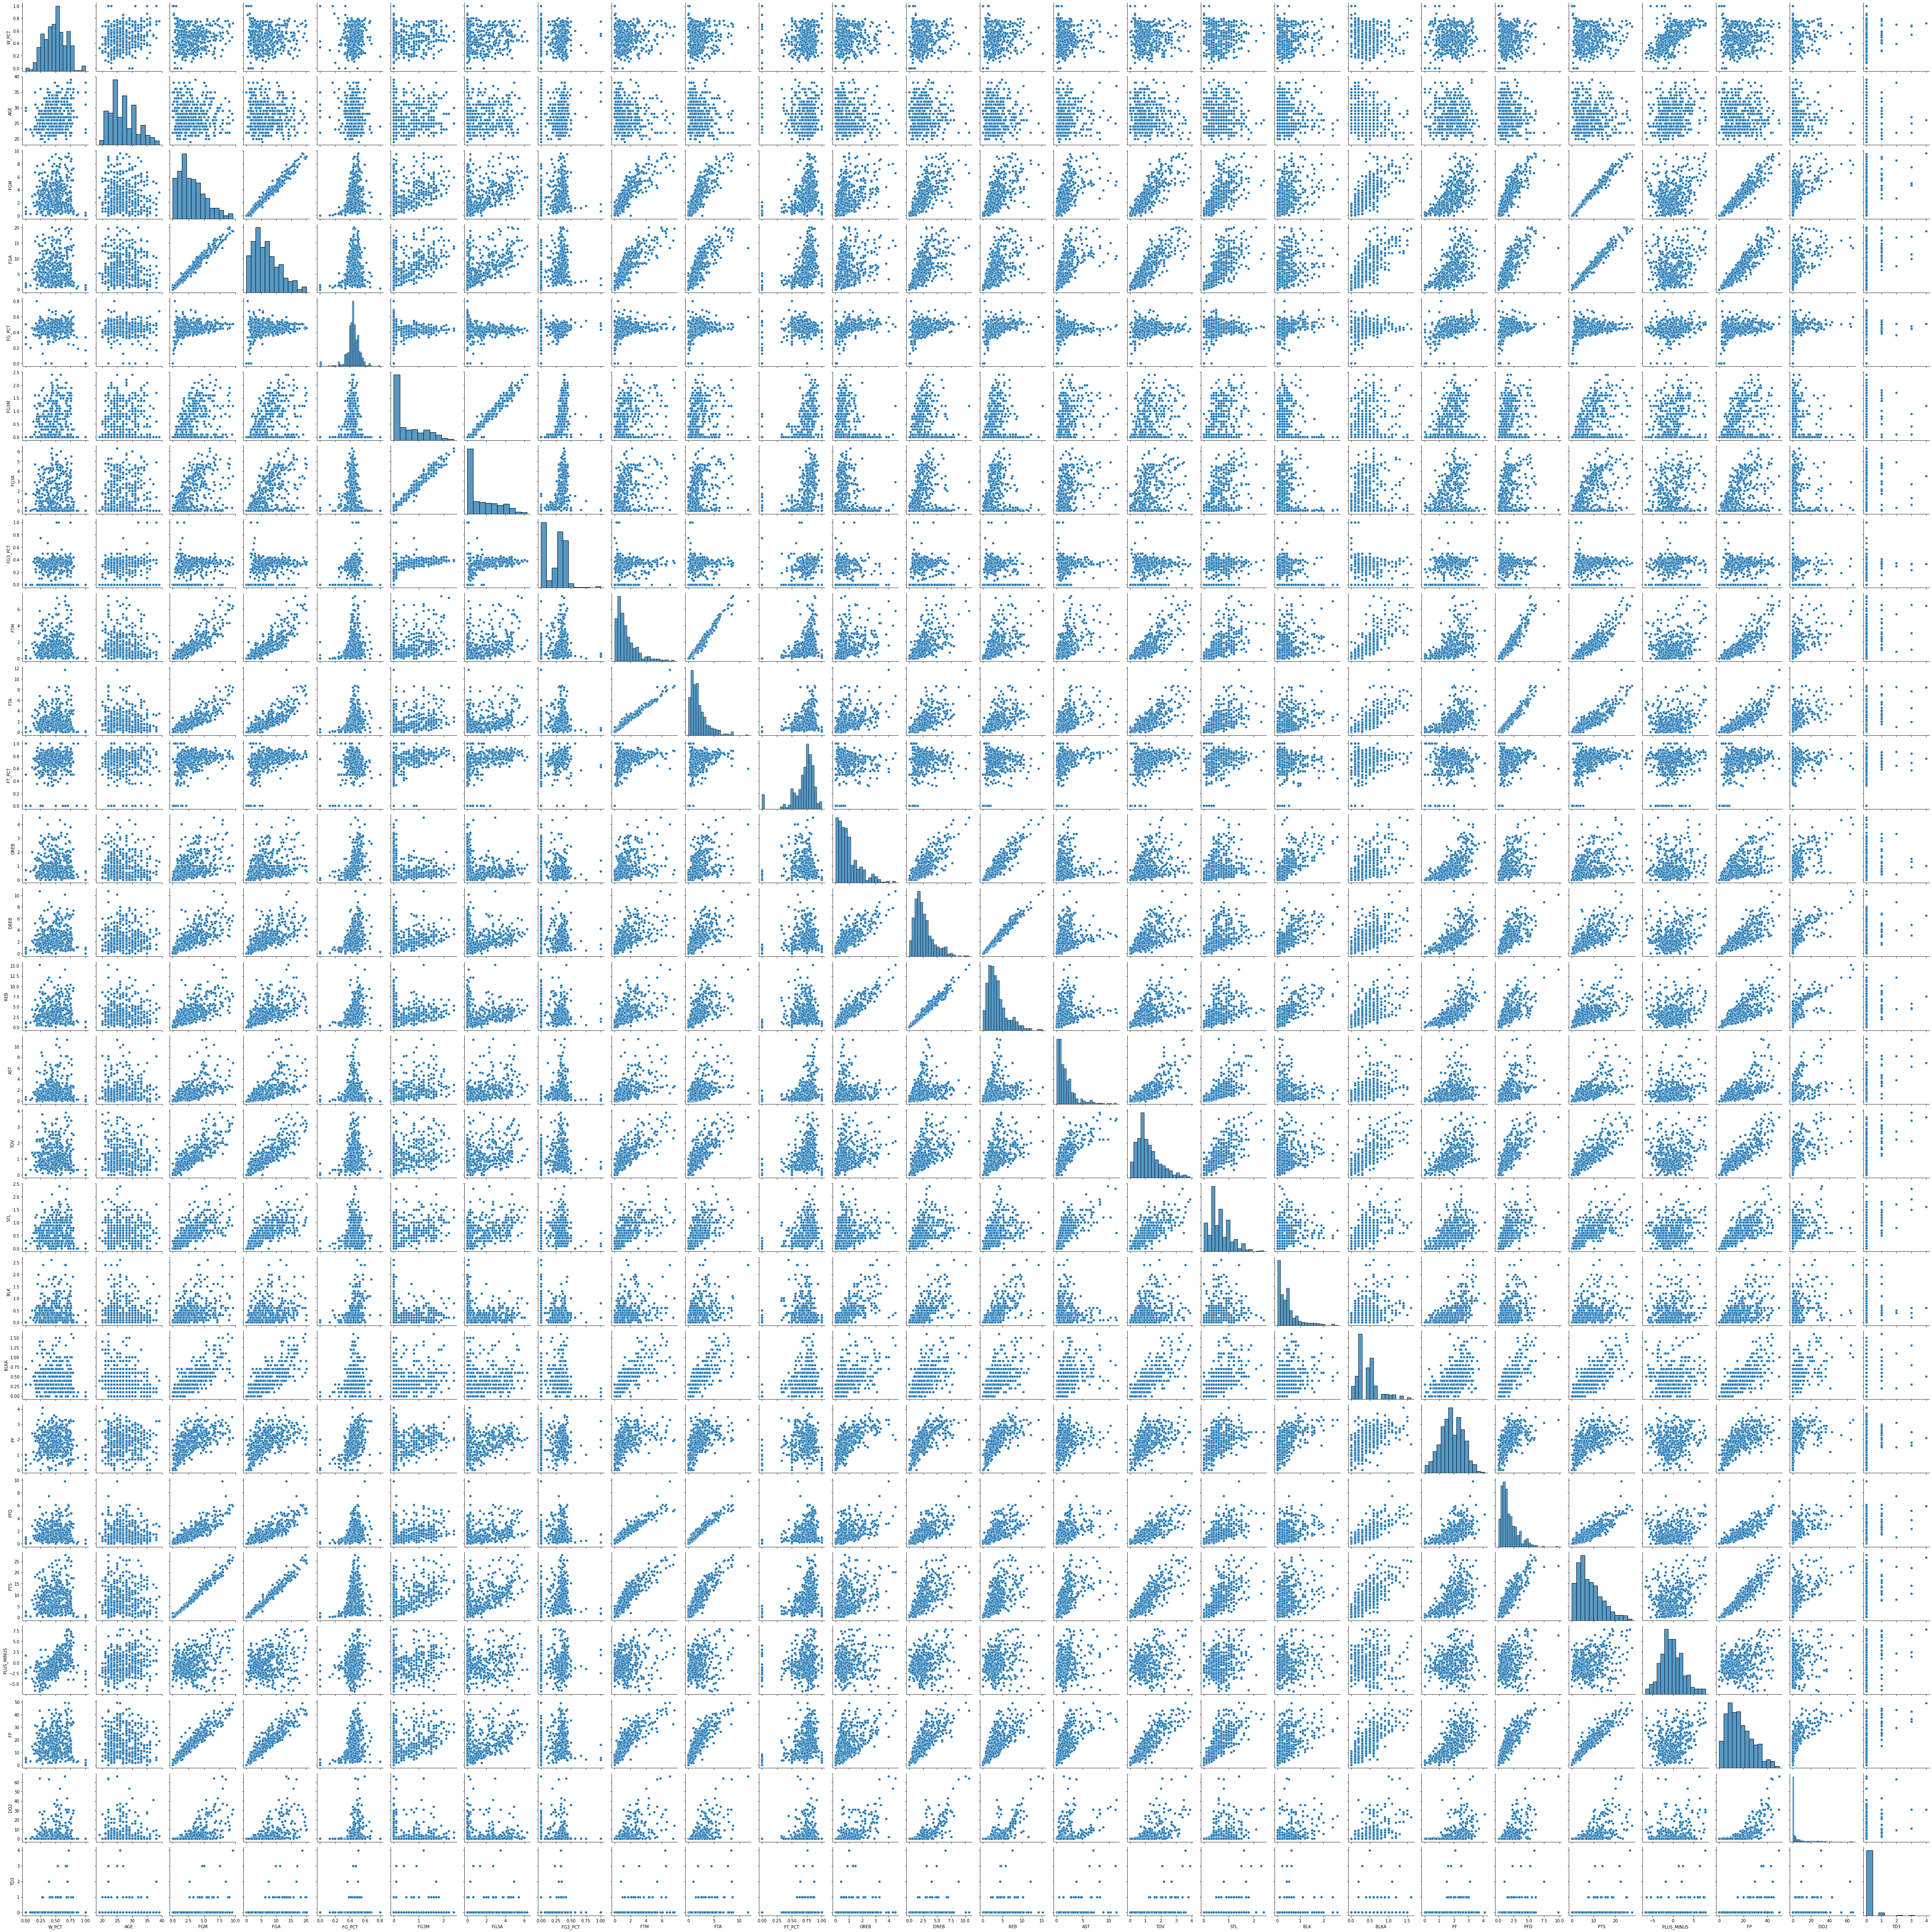

In [4]:
# in linear regression, need to make sure the predictor and preditant has a linear relationship,
# and the predictors need be independent with each other
sb.pairplot(player)

In [6]:
print(player.corr())

               W_PCT       AGE       FGM       FGA    FG_PCT      FG3M  \
W_PCT       1.000000  0.247332  0.025628 -0.009843 -0.016073  0.059076   
AGE         0.247332  1.000000 -0.069712 -0.077493 -0.036661  0.045897   
FGM         0.025628 -0.069712  1.000000  0.983173  0.310900  0.429507   
FGA        -0.009843 -0.077493  0.983173  1.000000  0.199176  0.521916   
FG_PCT     -0.016073 -0.036661  0.310900  0.199176  1.000000 -0.109027   
FG3M        0.059076  0.045897  0.429507  0.521916 -0.109027  1.000000   
FG3A        0.041176  0.035283  0.438736  0.543347 -0.161076  0.984914   
FG3_PCT     0.003562  0.076686  0.256661  0.316232 -0.071003  0.634479   
FTM         0.036216 -0.095736  0.860570  0.847905  0.233117  0.328011   
FTA         0.026739 -0.108372  0.851734  0.825184  0.280399  0.254355   
FT_PCT     -0.031806 -0.006663  0.419730  0.444324  0.190396  0.398531   
OREB       -0.019949 -0.073948  0.423115  0.325722  0.456924 -0.297256   
DREB        0.063401  0.026502  0.7041